# <center> R3.08 - Probabilités <br> Anonymisation de réponses : Randomized responses </center>
<center> Th. Godin, A. Ridard </center>



In [2]:
# importation des modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

Le but de ce notebook<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) est d'illustrer une technique de sondage permettant d'obtenir des informations sur des sujets "sensibles".

Imaginons qu'une personne soit chargée d'estimer<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2) la _proportion de bretons mangeants du beurre doux_. Comme la question est sensible, il est vraissemblable que si l'on pose directement la question, certaines personnes intérogées mentent, ce qui fausserait le résultat.

Pour éviter cela, elle propose aux participants le protocole suivant :

   - La personne lance un dé à 6 face (équilibré)
   -   - Si le résultat est entre 1 et 5, la personne répond la vérité
       - Sinon (si le résultat est 6), la personne répond en mentant (dit l'inverse)
       
       
On va noter : 

- $B_d$ l'événement "mange du beurre doux" (que l'on souhaite mesurer)
- $D \sim \mathcal{U}_6$ la variable aléatoire représentant le résultat du dé (que l'on comprend bien) 
- $R$ l'évenement "répond manger du beurre doux" (que l'on a mesuré par le sondage).
----

 <a name="cite_note-1"></a>1. [^](#cite_ref-1) Assez théorique au final : il ne contient que 2 cases de python, s'en servant essentielement comme d'une calculette.
 <a name="cite_note-2"></a>2. [^](#cite_ref-2) On utilisera le vocabulaire statistique, mais les résultats que l'on traite sont de nature probabilistes ; même s'ils se transposent facilement en stat.

On a alors : 

\begin{align*}
\mathbb{P}(R) &\overset{proba.~ totales}{ = } \mathbb{P}(R|D <6)P(D<6) + \mathbb{P}(R|D =6)P(D=6)\\
~\\
& \textit{Par construction du protocole, $\mathbb{P}(R|D <6)= \mathbb{P}(B_d)$ et $\mathbb{P}(R|D =6)= \mathbb{P}(\bar{B_d})$}\\
~\\
&= \mathbb{P}(B_d)P(D<6) + \mathbb{P}(\bar{B_d})P(D=6)\\
&= \mathbb{P}(B_d)\frac{5}{6} + (1-\mathbb{P}({B_d}))\frac{1}{6}\\
&= \frac16 + \frac46\mathbb{P}({B_d})\\
& \textit{Donc}\\
\mathbb{P}({B_d})&= \frac64(\mathbb{P}(R) -\frac16)
\end{align*}


----

_Application numérique :_ Avec le sondage, on mesure que $25\%$ des répondants affirme manger du beurre doux, la proportion réélle est donc
\begin{align*}
\mathbb{P}({B_d})&= \frac64(\mathbb{P}(R) -\frac16)\\
&= \frac64(\frac{1}{4} -\frac16)\\
&= \frac18\\
\end{align*}

Pour terminer, on peut tracer le diagramme $\mathbb{P}({R})= f(\mathbb{P}(B_d)) = \frac16 + \frac46\mathbb{P}({B_d})$ donnant a proportion réelle en fonction de la proportion observée.

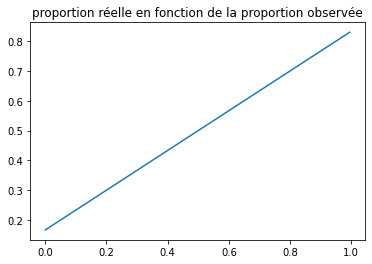

In [3]:
reelle=np.arange(0,1,0.005)
obs=[1/6 +4/6 * i for i in reelle]


plt.plot(reelle,obs)
plt.title('proportion réelle en fonction de la proportion observée')
plt.draw()
plt.show()


**remarques :** La dépendance entre la proportion réélle  et celle observée est linéaire, cependant on  ne peut pas observer toutes les valeurs entre $0$ et $1$ !
En effet, si la proportion réelle était $0$ on aurait forcémeent $\frac16$ de personne répondant manger du beurre doux, et inversement pour une proportion réelle de $1$ on observera seulement $\frac56$ de réponse positives.

----

## Test numérique

On va vérifié que notre modèle est cohérent\footnote{ là encore on a une approche assez stateuse (fréquenciste) des probabilité. Cette approche est justifiée mais nous n'auront pas le temps de rentrer dans les datails.}.
Pour cela on va fixer $\mathbb{P}(B_b) \sim \mathcal{B}(p)$ et mesurer via un grand nombre d'essais la probabilité de réponse.

In [16]:
npr.binomial(1,.9,10)
npr.randint(1,6,100)

array([5, 3, 4, 1, 5, 4, 4, 2, 5, 4, 5, 2, 1, 1, 2, 4, 4, 5, 2, 3, 5, 4,
       1, 2, 5, 1, 3, 1, 4, 5, 3, 1, 3, 1, 2, 3, 1, 1, 2, 2, 4, 5, 4, 5,
       4, 3, 4, 3, 2, 2, 5, 3, 3, 4, 5, 4, 2, 1, 4, 3, 2, 2, 1, 1, 1, 4,
       1, 1, 5, 4, 5, 5, 1, 4, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 1, 1, 1, 2,
       3, 4, 2, 1, 2, 3, 1, 5, 4, 5, 2, 5])

In [32]:
def exp(p):
    
    sale = npr.binomial(1,p)
    #la personne mange du beurre salé
    dice = npr.randint(1,7)
    #resultat du dé
    
    if dice<6:
        return sale
    else :
        return abs(1-sale) #dirty


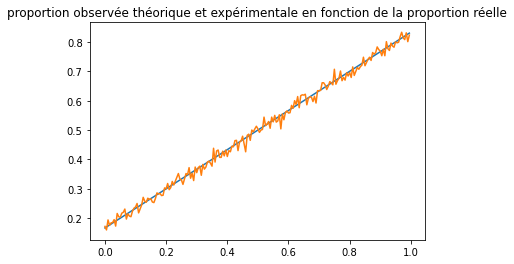

In [33]:


reelle=np.arange(0,1,0.005)
obs=[1/6+4/6*i for i in reelle]
expe=[np.mean([exp(i) for j in range(1000)]) for i in reelle]


plt.plot(reelle,obs)
plt.plot(reelle,expe)

plt.title('proportion observée théorique et expérimentale en fonction de la proportion réelle')
plt.draw()
plt.show()

---
---

**_Variante :_** On peut procéder à un raisonement similaire avec comme hypothèse

   - Si le dé donne 1, la personne répond "Oui"
   - Sinon, la personne répond la vérité
   
Là encore la mise en équation permet de récupérer (encore plus) facilement le proportion réelle de bretons qui mangent du beurre doux.  Vous pouvez aussi consulter [wikipedia](https://en.wikipedia.org/wiki/Randomized_response)